In [20]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# from sklearn.metrics.pairwise import cosine_similarity
# from sklearn.feature_extraction.text import CountVectorizer

import spacy
# import en_core_web_trf

from collections import defaultdict, Counter

In [2]:
# nlp = spacy.load("en_core_web_sm")
nlp = spacy.load("en_core_web_lg")
# nlp = spacy.load("en_core_web_trf")

spacy.prefer_gpu()

True

In [45]:
pos_counts = defaultdict(Counter)

dear_ceo_folder = '.\data\dear_ceo'
year_dict = {}
for filename in os.listdir(dear_ceo_folder):
    if filename.endswith(".txt"):
        with open(os.path.join(dear_ceo_folder, filename), 'r', encoding='utf-8') as f:
            text = f.read()
            doc = nlp(text)
            
            for token in doc:
                pos_counts[token.pos][token.orth] += 1


word =[]
pos_list = []
count_list = []

for pos_id, counts in sorted(pos_counts.items()):
    pos = doc.vocab.strings[pos_id]

    for orth_id, count in counts.most_common(5):
        print(pos, count, doc.vocab.strings[orth_id])
        if pos not in ['ADP', 'AUX', 'CCONJ', 'DET', 'NUM', 'PART','PUNCT' ,'SCONJ' ,'SYM','X', 'SPACE']:
            word.append(doc.vocab.strings[orth_id])
            pos_list.append(pos)
            count_list.append(count)



ADJ 151 long
ADJ 41 global
ADJ 33 more
ADJ 32 corporate
ADJ 29 many
ADP 431 of
ADP 249 to
ADP 235 in
ADP 211 for
ADP 123 with
ADV 56 more
ADV 39 also
ADV 24 only
ADV 21 increasingly
ADV 20 well
AUX 197 is
AUX 168 are
AUX 130 will
AUX 98 be
AUX 77 have
CCONJ 549 and
CCONJ 50 or
CCONJ 33 And
CCONJ 31 but
CCONJ 24 But
DET 666 the
DET 341 a
DET 54 these
DET 48 this
DET 46 an
INTJ 1 please
NOUN 183 companies
NOUN 170 term
NOUN 111 company
NOUN 64 capital
NOUN 62 clients
NUM 30 zero
NUM 24 one
NUM 10 2020
NUM 5 two
NUM 5 2015
PART 380 to
PART 97 ’s
PART 87 not
PART 19 ’
PART 12 n’t
PRON 168 we
PRON 130 their
PRON 116 our
PRON 110 that
PRON 90 your
PROPN 67 BlackRock
PROPN 18 Larry
PROPN 18 Fink
PROPN 15 U.S.
PROPN 10 Dear
PUNCT 853 ,
PUNCT 681 .
PUNCT 242 -
PUNCT 147 –
PUNCT 28 ;
SCONJ 111 that
SCONJ 62 how
SCONJ 37 as
SCONJ 20 if
SCONJ 20 As
SYM 7 $
SYM 1 -
VERB 40 have
VERB 34 believe
VERB 33 need
VERB 29 including
VERB 23 help
X 1 michelle.edkins@blackrock.com
X 1 BlackRock.com/purpose
X 

In [95]:
def unique(list1):
 
    # initialize a null list
    unique_list = []
 
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list
    for x in unique_list:
        print(x)
        
unique(pos_list)

ADJ
ADV
INTJ
NOUN
PRON
PROPN
VERB


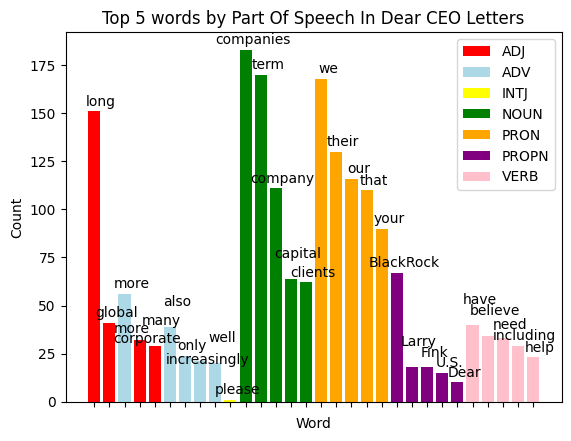

In [110]:
fig, ax = plt.subplots()

colors = {'ADJ':'red', 'ADV':'lightblue', 'INTJ':'yellow', 'NOUN':'green', 'PRON': 'orange', 'PROPN':'purple','VERB':'pink'}


pps = ax.bar(word, count_list, label = pos_list, color = [colors[x] for x in pos_list])
ax.set_xticklabels('')
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Top 5 words by Part Of Speech In Dear CEO Letters')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

i = 0
for p in pps:
   height = p.get_height()
   wrd = word[i]
   if wrd in ['capital', 'Larry', 'have', 'believe','well','many', 'also']:
      ax.annotate('{}'.format(wrd),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(5, 13), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   elif wrd in ['need','Fink']:
      ax.annotate('{}'.format(wrd),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(5, 5), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   elif wrd in ['increasingly', 'corporate']:
      ax.annotate('{}'.format(wrd),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(5, -4), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   else:
      ax.annotate('{}'.format(wrd),
         xy=(p.get_x() + p.get_width() / 2, height),
         xytext=(5, 2), # 3 points vertical offset
         textcoords="offset points",
         ha='center', va='bottom')
   i = i + 1

In [12]:
def process_text(text):
    doc = nlp(text.lower())
    result = []
    for token in doc:
        if token.text in nlp.Defaults.stop_words:
            continue
        if token.is_punct:
            continue
        if token.lemma_ == '-PRON-':
            continue
        result.append(token.lemma_)
    return " ".join(result)

In [13]:
text1 = '.\data\8k_2015\\001\AMAT_0000006951_8K_20150123_8-K_excerpt.txt'
text2 = '.\data\8k_2015\\001\AAL_0000004515_8K_20140103_8-K_excerpt.txt'

In [14]:
text1 = open(text1, "r", encoding="utf8").read()
text2 = open(text2, "r", encoding="utf8").read()
text1 = nlp(process_text(text1))
text2 = nlp(process_text(text2))

In [15]:
text1
print([(w.text, w.pos_) for w in text1])

[('8', 'NUM'), ('k', 'PROPN'), ('  \n\n ', 'SPACE'), ('united', 'PROPN'), ('states', 'PROPN'), (' \n\n ', 'SPACE'), ('securities', 'NOUN'), ('exchange', 'PROPN'), ('commission', 'PROPN'), (' \n\n ', 'SPACE'), ('washington', 'PROPN'), ('d.c', 'PROPN'), ('20549', 'NUM'), (' \n\n ', 'SPACE'), ('form', 'VERB'), ('8', 'NUM'), ('k', 'NOUN'), (' \n\n ', 'SPACE'), ('current', 'ADJ'), ('report', 'NOUN'), (' \n\n ', 'SPACE'), ('pursuant', 'ADJ'), ('section', 'NOUN'), ('13', 'NUM'), ('15(d', 'NUM'), (' \n\n ', 'SPACE'), ('security', 'NOUN'), ('exchange', 'PROPN'), ('act', 'NOUN'), ('1934', 'NUM'), (' \n\n ', 'SPACE'), ('date', 'NOUN'), ('report', 'NOUN'), ('date', 'NOUN'), ('early', 'ADJ'), ('event', 'NOUN'), ('report', 'NOUN'), ('january', 'PROPN'), ('23', 'NUM'), ('2015', 'NUM'), (' \n\n ', 'SPACE'), ('apply', 'VERB'), ('material', 'PROPN'), ('inc', 'PROPN'), (' \n\n ', 'SPACE'), ('exact', 'ADJ'), ('registrant', 'NOUN'), ('specify', 'VERB'), ('charter', 'NOUN'), (' \n\n   ', 'SPACE'), ('data_ta

In [16]:
text1.similarity(text2)

0.9464708474813811